In [1]:
import pandas as pd
import numpy as np
import simply
from simply import redshift
from read_query_url import read_query
from datetime import date, datetime, time
from dateutil import relativedelta
from simply import simple_colors
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
from datetime import date, datetime, time
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
new_brand_palette = ['#0D97FF', '#FD2B10', '#24D3C1', '#FFBA00', '#706AFE', '#FF9999', '#FF673D',  '#91D174', '#005DA4', '#98D3AE', '#F0D9A8', '#89EA29']
new_goals = sns.color_palette(palette=new_brand_palette)
sns.set_palette(new_goals)
sns.set_style('darkgrid')
register_matplotlib_converters()

## Save results as CSV? (True/False)

In [2]:
#### Set this to True on 4th business day of the month
as_csv = True


## Run Charts from CSV? (True/False)

In [3]:
run_from_csv = False

In [4]:
# If running charts from a pre-existing CSV, add the date prefix for the files you want to use. 
# Example: for '2018-03-05_Total_Customers_Archive.csv', enter:
# prefix = '2018-03-05'

prefix = '2019-07-08' #only applicable if running from pre-existing csv

In [5]:
def dateparse(x):
    y, m, d = x.split('-')
    rd = date(int(y), int(m), int(d))
    return rd

In [6]:
last_month = date(date.today().year, date.today().month, 1) + relativedelta.relativedelta(months=-1)

# Number of Customers

## Total Customers

In [7]:
customers_query = read_query('customer_counts.sql')

In [8]:
if run_from_csv:
    customers = pd.read_csv("../output/{}_Total_Customers_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1])
    customers['month'] = [dt.to_pydatetime().date() for dt in customers.month]
else:
    customers = redshift(customers_query)

In [9]:
if as_csv:
    customers.to_csv("../new_cust_output/{}_Total_Customers_Archive.csv".format(date.today().strftime('%Y-%m-%d')), date_format='%Y-%m-%d')
    print('Saved Total Customers results to CSV.')

Saved Total Customers results to CSV.


In [10]:
customers = customers[customers.month >= date(2018,7,1)]

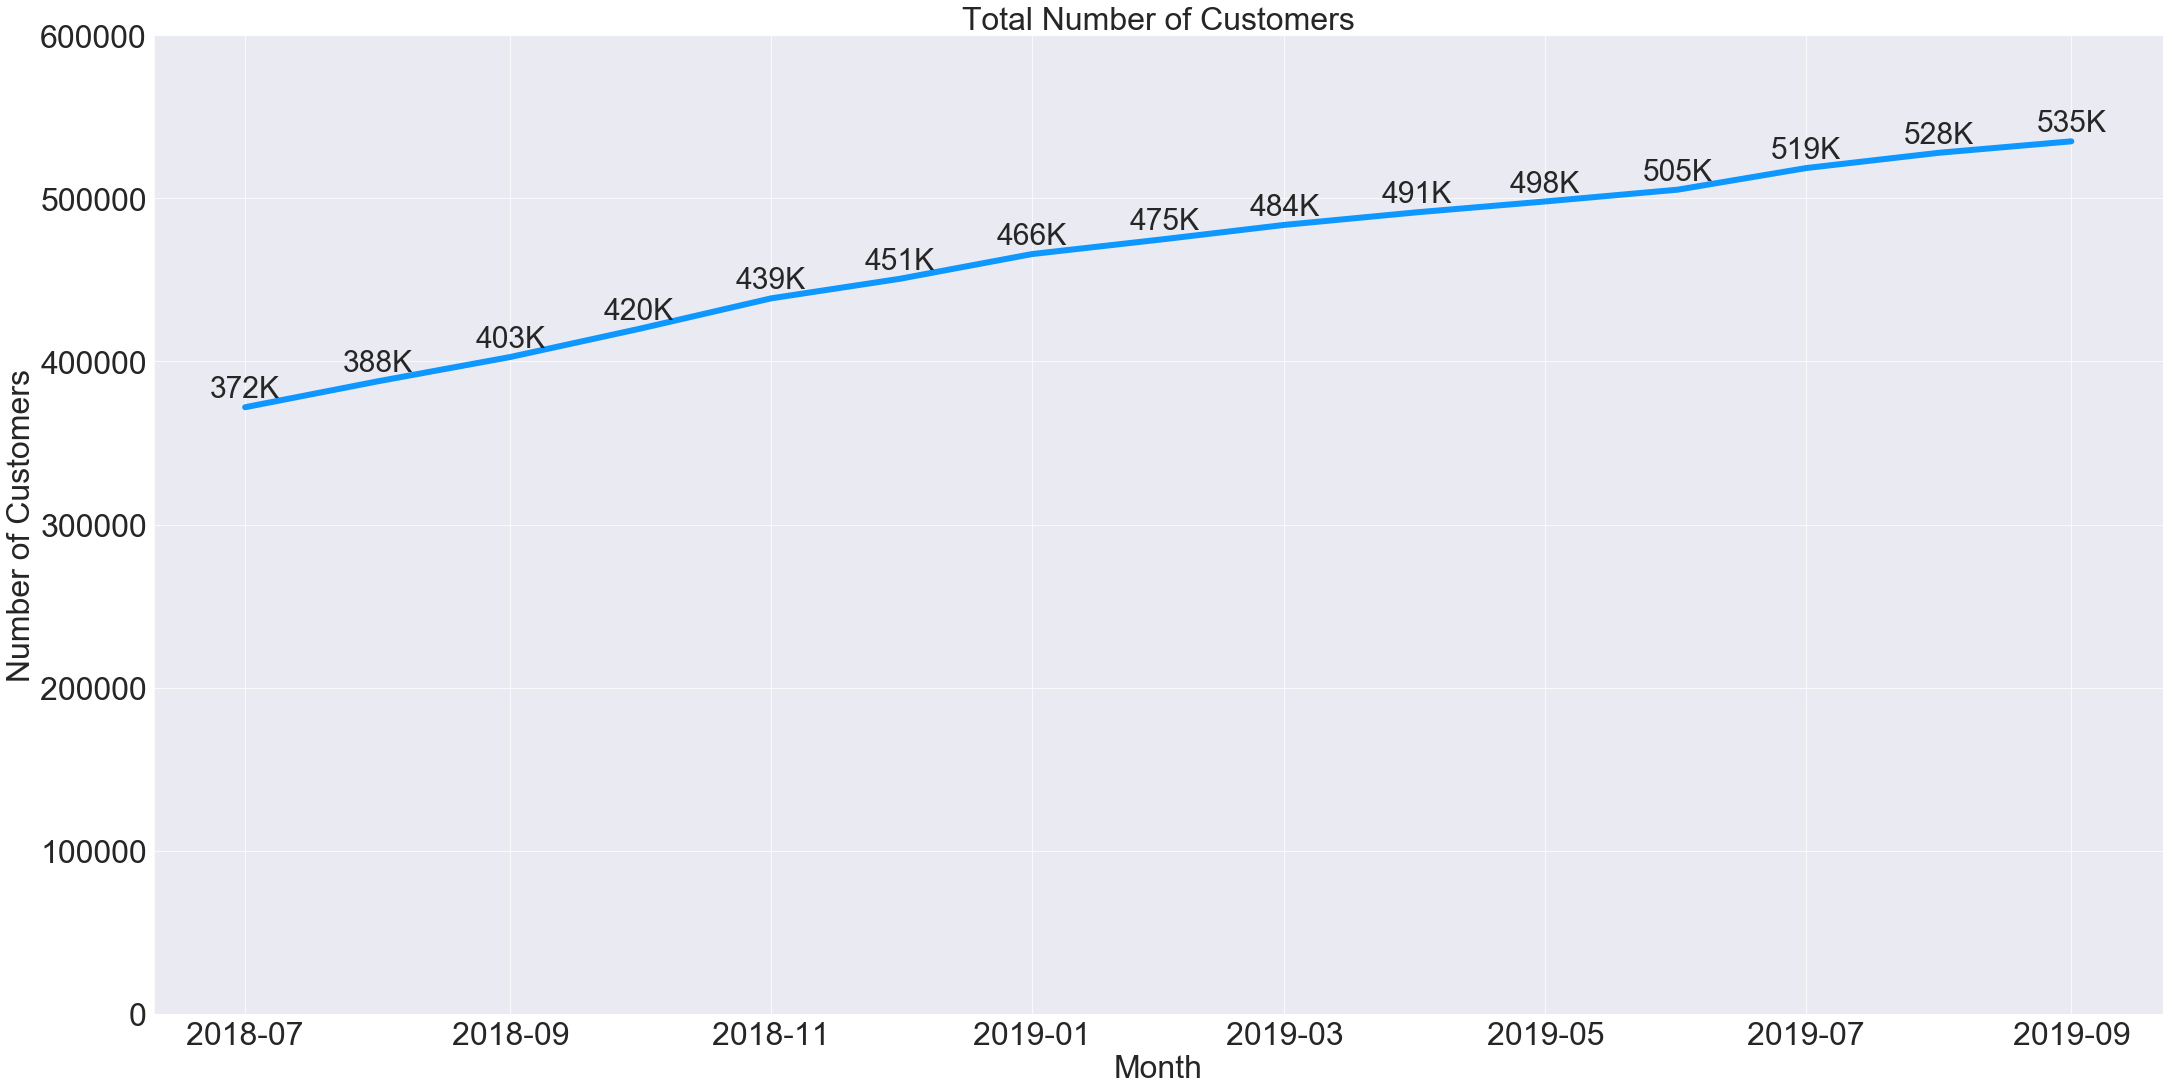

In [11]:
fig, ax = plt.subplots(figsize=(36,18))
ax.plot(customers.month, customers.customer_count, linewidth=6)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.ylim(0,600000)
plt.xlabel('Month', fontsize=32)
plt.ylabel('Number of Customers', fontsize=32)
plt.title('Total Number of Customers', fontsize=32)
# val = list(customers[customers.month == last_month].customer_count)
# ax.text(last_month, val[0]+3000, val[0], fontsize=32, ha='center')

for m in customers.month:
    customer_count = int(round(float(customers[customers.month == m].customer_count/1000)))
    customer_count_str = str(customer_count) + 'K'

    plt.text(m,
            customers[customers.month == m].customer_count+6000, customer_count_str,
            fontsize=30,
            ha='center')
    
plt.savefig('../print_screen/{}_total_customers.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))

In [12]:
shared_query = read_query('Monthly_Shared_Accountholders.sql')

In [13]:
if run_from_csv:
    shared = pd.read_csv("../output/{}_Shared_Percent_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1])
    shared['month'] = [dt.to_pydatetime().date() for dt in shared.month]
else:
    shared = redshift(shared_query)

In [14]:
# Save dataframe as CSV:
if as_csv:
    shared.to_csv("../new_cust_output/{}_Shared_Percent_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved Shared Percent results to CSV.')

Saved Shared Percent results to CSV.


In [15]:
customers.reset_index(drop=True, inplace=True)

In [16]:
shared = shared[shared.month >= date(2018,7,1)]

In [17]:
shared.reset_index(drop=True, inplace=True)

In [18]:
shared['shared_freq'] = (shared.total_users/customers.customer_count)*100

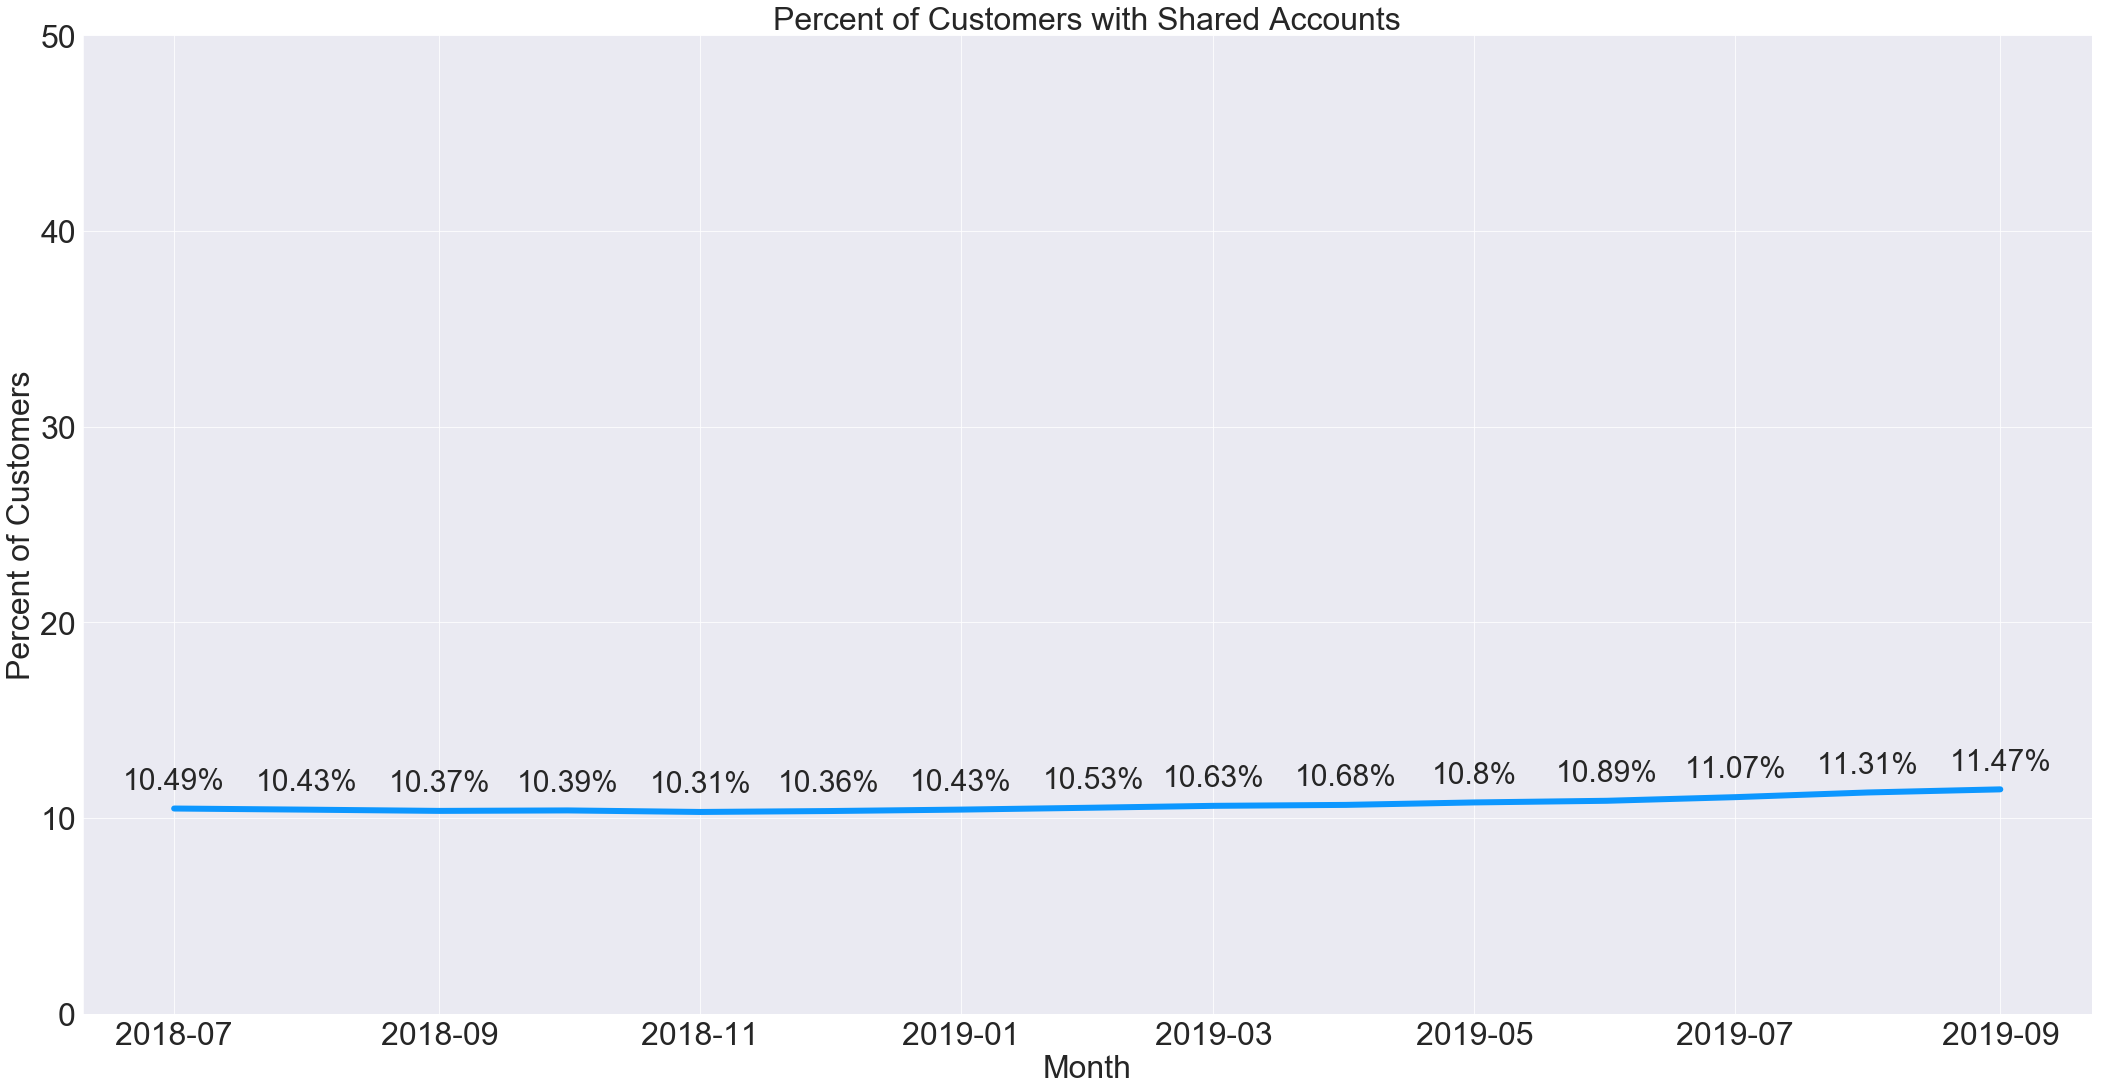

In [19]:
fig, ax = plt.subplots(figsize=(36,18))
ax.plot(shared.month, shared.shared_freq, linewidth=6)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Month', fontsize=32)
plt.ylim(0,50)
plt.ylabel('Percent of Customers', fontsize=32)
plt.title('Percent of Customers with Shared Accounts', fontsize=32)

for m in shared.month:
    plt.text(m,
            shared[shared.month == m].shared_freq+1,
            str(round(float(shared[shared.month == m].shared_freq), 2))+'%',
            fontsize=30,
            ha='center')

plt.savefig('../print_screen/{}_monthly_shared_accounts.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))

## Enrollments

In [20]:
enrollments_query = read_query('enrolled.sql')

In [21]:
if run_from_csv:
    enrollments_df = pd.read_csv("../output/{}_Monthly_Enrollments_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1])
    enrollments_df['month'] = [dt.to_pydatetime().date() for dt in enrollments_df.month]
else:
    enrollments_df = redshift(enrollments_query)

#### Save Data to a CSV for Future Analysis

In [22]:
# Save dataframe as CSV:
if as_csv:
    enrollments_df.to_csv("../new_cust_output/{}_Monthly_Enrollments_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved Monthly Enrollments results to CSV.')

Saved Monthly Enrollments results to CSV.


In [23]:
enrollments_df = enrollments_df[enrollments_df.month >= date(2018,7,1)]

In [24]:
enrollments_df

,month,users
15,2018-07-01,10702
16,2018-08-01,18094
17,2018-09-01,18029
18,2018-10-01,30319
19,2018-11-01,20970
20,2018-12-01,14017
21,2019-01-01,17699
22,2019-02-01,11282
23,2019-03-01,10848
24,2019-04-01,10085


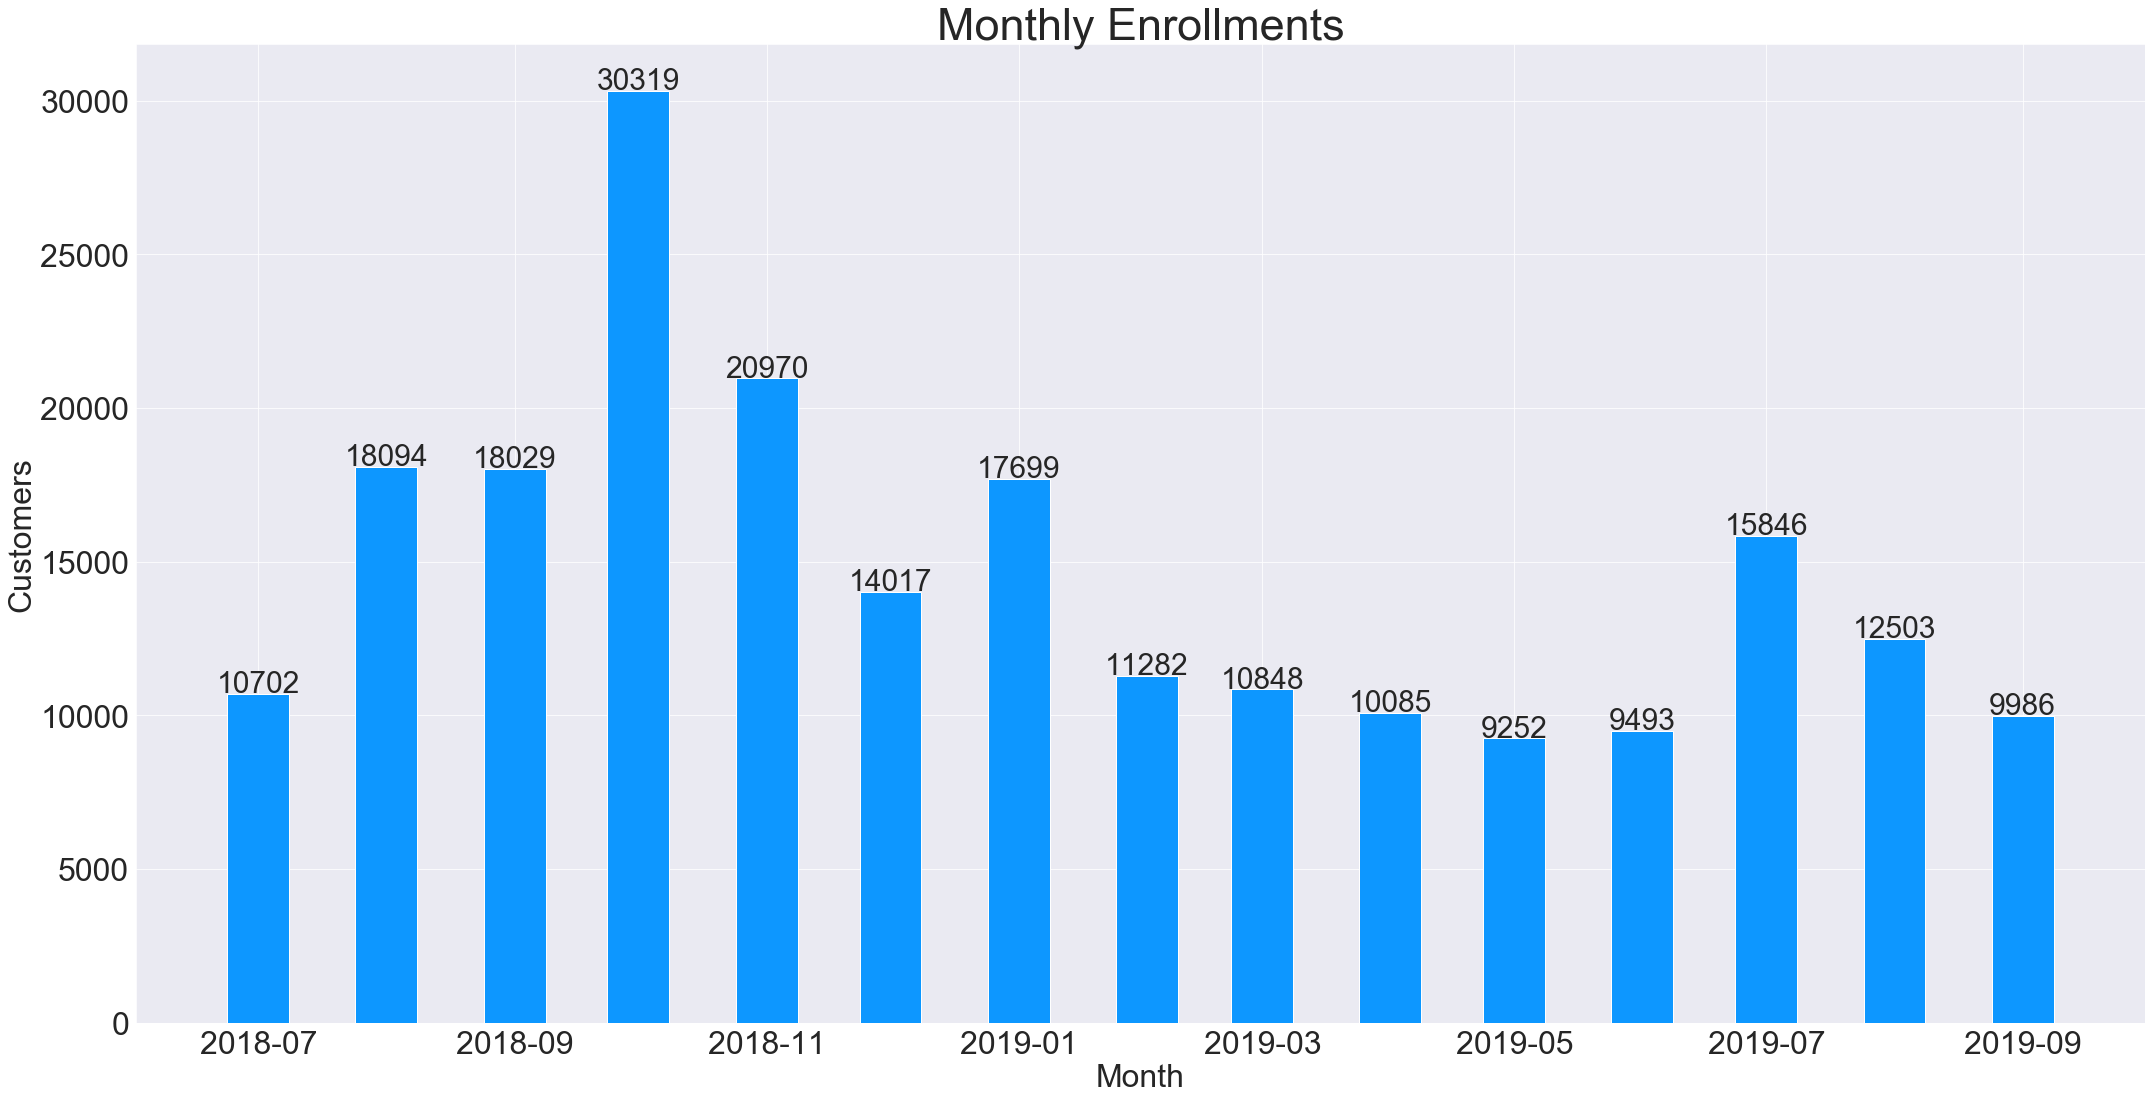

In [25]:
fig, ax = plt.subplots(figsize=(36,18))
p1 = plt.bar(enrollments_df.month, enrollments_df.users, width=15)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.ylabel('Customers', fontsize=32)
plt.xlabel('Month', fontsize=32)
plt.title('Monthly Enrollments', fontsize=45)

for m in enrollments_df.month.unique():
    ax.text(m, enrollments_df[enrollments_df.month == m].users+50, str(int(enrollments_df[enrollments_df.month == m].users)), fontsize=30, ha='center')

plt.savefig('../print_screen/{}_monthly_enrollments.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))


# Revenue Drivers

## Deposits

In [26]:
deposits_query = read_query('Monthly_Average_Deposits.sql')

In [27]:
if run_from_csv:
    avg_monthly_deposits = pd.read_csv("../output/{}_Average_Deposits_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1])
    avg_monthly_deposits['month'] = [dt.to_pydatetime().date() for dt in avg_monthly_deposits.month]
else:
     avg_monthly_deposits = redshift(deposits_query)
#     avg_monthly_deposits = redshift("""
    
#     SELECT DISTINCT
#   DATE_TRUNC('month', fud.date)::date as month,
#     ROUND(AVG(deposit_amount::FLOAT)*30,2) AS average_deposits
# FROM curated.fact_user_day fud 
# WHERE fud.num_open_accounts > 0 
#   AND date < DATE_TRUNC('month', current_date)

#   AND ((DATE_TRUNC('month', fud.date)::date >= dateadd('month', -6, date_trunc('month', current_date))) OR (DATE_TRUNC('month', fud.date)::date >= '2017-04-01'))
# GROUP BY 1 
# ORDER BY 1 ASC;
#     """)

In [28]:
# Save dataframe as CSV:
if as_csv:
    avg_monthly_deposits.to_csv("../new_cust_output/{}_Average_Deposits_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved Average Deposits results to CSV.')

Saved Average Deposits results to CSV.


In [29]:
"""
Currently not reporting median deposits, as it's $0. If that changes, we should highlight it. 
""" 
 
# median_deposits = redshift("""
# WITH users AS (
# SELECT 
# 	DATE_TRUNC('month', dca.date)::date as month, 
# 	user_id, 
# 	SUM(deposit_volume) as monthly_deposits
# FROM 
# 	mtr_daily_customer_activity dca
# WHERE 
#     DATE_TRUNC('month',date) < DATE_TRUNC('month', CURRENT_DATE)
# 	AND DATE_TRUNC('year',date) > '2012-01-01'
# GROUP BY 
# 	1, 2)

# SELECT DISTINCT
# 	month, 
# 	MEDIAN(monthly_deposits::float) OVER(PARTITION BY month) as median_monthly_deposits
# FROM
# 	users
# WHERE 
#     month < DATE_TRUNC('month', current_date)
# --     month <= DATE_TRUNC('month', DATEADD(month, -1, CURRENT_DATE))
#      AND (month >= dateadd('month', -6, date_trunc('month', current_date))) OR (month >= '2017-04-01')
# ORDER BY 
# 	1 ASC;""")

"\nCurrently not reporting median deposits, as it's $0. If that changes, we should highlight it. \n"

In [29]:
avg_monthly_deposits = avg_monthly_deposits[avg_monthly_deposits.month >= date(2018,7,1)]

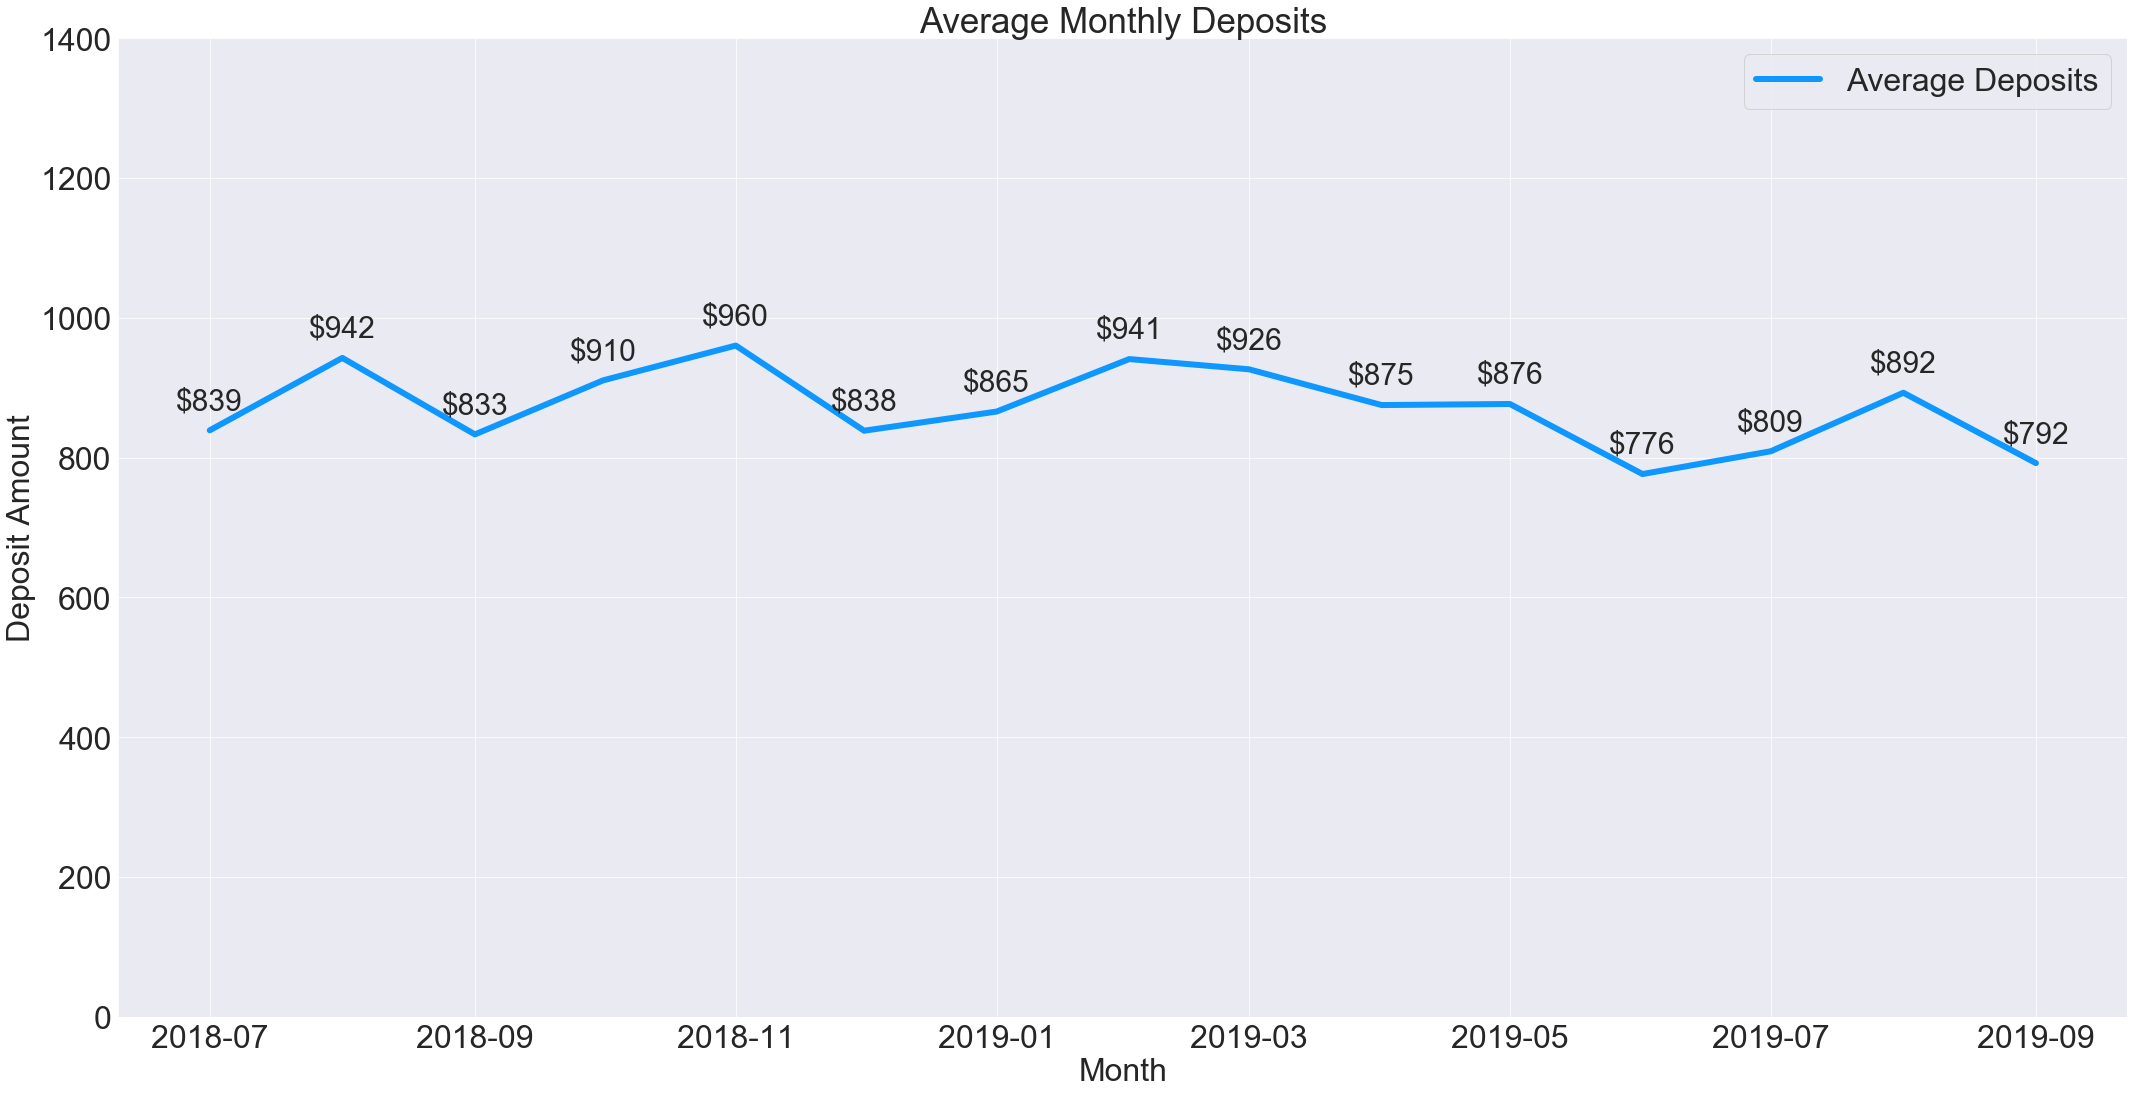

In [30]:
fig, ax = plt.subplots(figsize=(36,18))
ax.plot(avg_monthly_deposits.month, avg_monthly_deposits.average_deposits, linewidth=6)
# ax.plot(avg_monthly_deposits.month, median_deposits.median_monthly_deposits, linewidth=6)
plt.xlabel('Month', fontsize = 32)
plt.ylabel('Deposit Amount', fontsize = 32)
plt.title('Average Monthly Deposits', fontsize = 35)
plt.legend(['Average Deposits', 'Median Deposits'], fontsize=32)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.ylim(0, 1400)

# vals = [str(int(v)) for v in avg_monthly_deposits.average_deposits]

for m in avg_monthly_deposits.month:
    plt.text(m, 
             avg_monthly_deposits[avg_monthly_deposits.month == m].average_deposits+30, 
             '$'+str(int(avg_monthly_deposits[avg_monthly_deposits.month == m].average_deposits)),
             fontsize=30,
             ha='center')

plt.savefig('../print_screen/{}_monthly_deposits.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))

plt.show()

# New Customer Quality

## 30-Day Deposit Rate

### skipping this section

In [32]:
deposit_monthly_query = read_query('New_Customer_Deposit_Rate_Yearly.sql')

In [33]:
if run_from_csv:
    balance_active_first30 = pd.read_csv("../output/{}_New_Customer_Monthly_Deposit_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1,2])
    balance_active_first30['month'] = [dt.to_pydatetime().date() for dt in balance_active_first30.month]
    balance_active_first30['cohort'] = [dt.to_pydatetime().date() for dt in balance_active_first30.cohort]
else:
    balance_active_first30 = redshift(deposit_monthly_query)

In [34]:
balance_active_first30['percent_balance_active'] = balance_active_first30.balance_num/balance_active_first30.user_num*100

In [35]:
# Save dataframe as CSV:
if as_csv:
    balance_active_first30.to_csv("../new_cust_output/{}_New_Customer_Monthly_Deposit_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved New Customer Monthly Deposits results to CSV.')

Saved New Customer Monthly Deposits results to CSV.


### All Years

In [36]:
data2 = balance_active_first30
data2 = data2.groupby('cohort').sum().reset_index()
data2.percent_balance_active = data2.balance_num/data2.user_num*100
data2.percent_balance_active

0    100.000000
1     71.805040
2     78.100097
3     65.407802
4     32.385404
5     27.391809
6     37.085045
7     28.901320
8     27.729197
Name: percent_balance_active, dtype: float64

In [37]:
# Save dataframe as CSV:
if as_csv:
    data2.to_csv("../new_cust_output/{}_New_Customer_Yearly_Deposit_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved New Customer Yearly Cohort Deposit results to CSV.')

Saved New Customer Yearly Cohort Deposit results to CSV.


In [38]:
x = [0,1,2,3,4,5,6]
y = data2.percent_balance_active
x,y

([0, 1, 2, 3, 4, 5, 6], 0    100.000000
 1     71.805040
 2     78.100097
 3     65.407802
 4     32.385404
 5     27.391809
 6     37.085045
 7     28.901320
 8     27.729197
 Name: percent_balance_active, dtype: float64)

# commenting out due to errors
plt.figure(figsize=(32,18))
x = [0,1,2,3,4,5,6]
y = data2.percent_balance_active
title = 'Percent of customers who made a deposit in the first 30 days'
ylabel = 'Percent of customers'
ylow = 0
ylim = 100
colors= ['#0D97FF', '#FD2B10', '#24D3C1', '#FFBA00', '#706AFE', '#FF9999', '#FF673D',  '#91D174',  '#005DA4', '#98D3AE']
labels = ['2012','2013','2014','2015','2016','2017', '2018 (So far)']
plt.bar(x,y, color = colors)
plt.ylabel(ylabel, fontsize=32)
plt.title(title, fontsize=32)
plt.xticks(x,labels, fontsize=32, ha='center')
plt.yticks(fontsize=32)
for l in x:
    plt.text(x[l], y[l]+1, int(y[l]), fontsize=28, ha='center')
plt.ylim(ylow,ylim)

plt.savefig('../print_screen/{}_yearly_deposit_rate.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))

plt.show()

### New Cohort Deposit Rates (Line Graph)

### Percent that has ever deposited

In [33]:
deposit_rate_cohort_query = read_query('New_Customer_Deposit_Rate_Monthly_Yearly_Cohort_30_Day_Definition.sql')

In [34]:
if run_from_csv:
    deposit_rate_cohort_data = pd.read_csv("../output/{}_New_Customer_Monthly_Yearly_Cohort_Deposit_Rate_Archive.csv".format(prefix), index_col=0)
#     first_dep = pd.read_csv("../output/{}_New_Customer_Monthly_Yearly_Cohort_Deposit_Rate_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1])
#     first_dep['cohort'] = [dt.to_pydatetime().date() for dt in first_dep.cohort]
else:
    deposit_rate_cohort_data = redshift(deposit_rate_cohort_query)

In [36]:
# Save dataframe as CSV:
if as_csv:
    deposit_rate_cohort_data.to_csv("../new_cust_output/{}_New_Customer_Monthly_Yearly_Cohort_Deposit_Rate_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved New Customer Monthly & Yearly Cohort Deposit Rate results to CSV.')

Saved New Customer Monthly & Yearly Cohort Deposit Rate results to CSV.


In [48]:
dep_rate_monthly_cohort = deposit_rate_cohort_data[(deposit_rate_cohort_data.cohort_type == 'month')
                                                  & (deposit_rate_cohort_data.cohort >= date(2018, 9, 1))]

In [49]:
dep_rate_monthly_cohort.head()

,cohort_type,cohort,cohort_year,months_enrolled,customers,depositors,deposit_rate
3982,month,2018-09-01,2018,0,18029,6567,36.424649
3983,month,2018-09-01,2018,1,17229,7713,44.767543
3984,month,2018-09-01,2018,2,17120,8151,47.610981
3985,month,2018-09-01,2018,3,17060,8410,49.296600
3986,month,2018-09-01,2018,4,16899,8475,50.150897


In [50]:
maxes = dep_rate_monthly_cohort[['cohort', 'months_enrolled']].groupby('cohort', as_index=False).max()

In [51]:
maxes.head()

,cohort,months_enrolled
0,2018-09-01,11
1,2018-10-01,10
2,2018-11-01,9
3,2018-12-01,8
4,2019-01-01,7


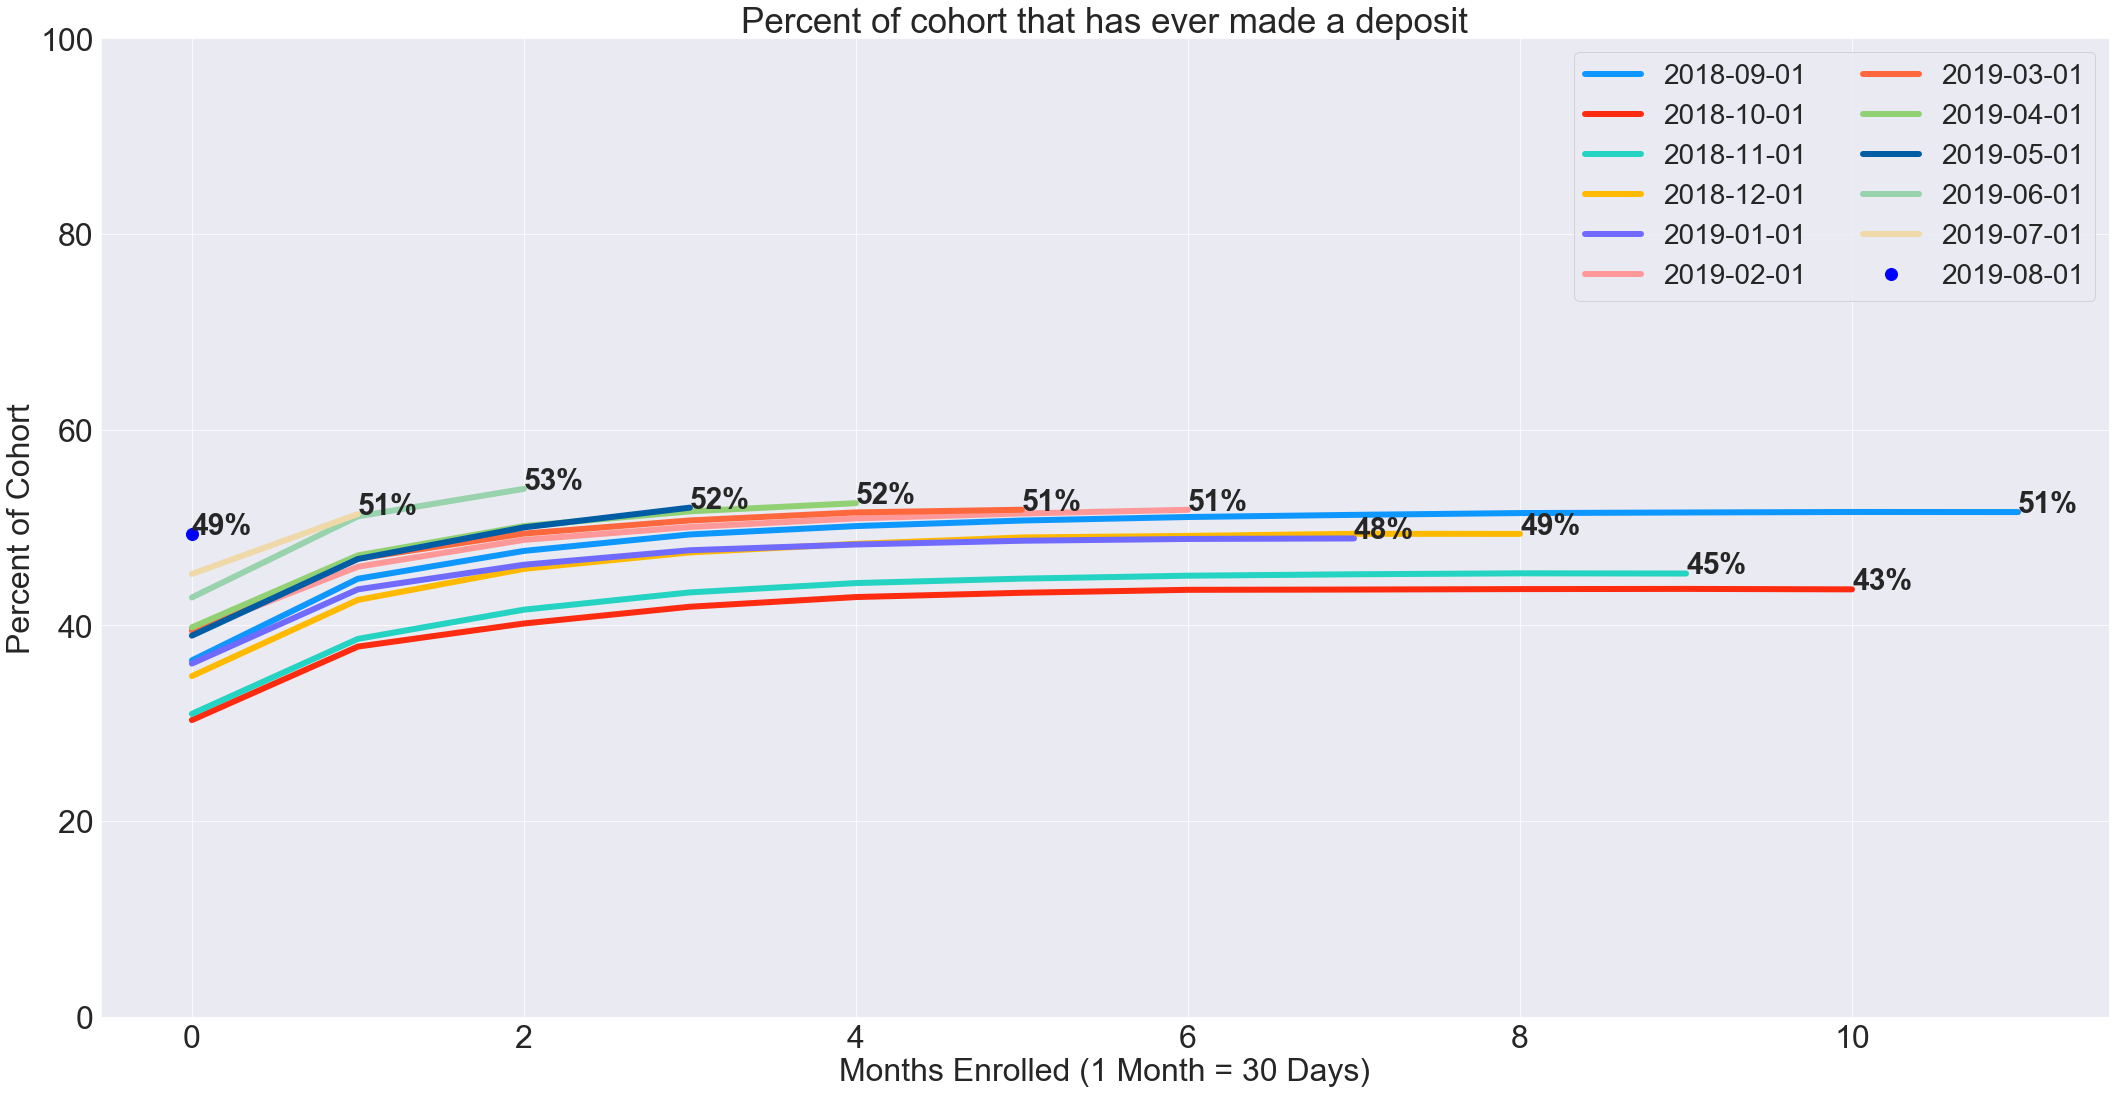

In [57]:
last_month = dep_rate_monthly_cohort.cohort.max()

fig, ax = plt.subplots(figsize=(36,18))

c = dep_rate_monthly_cohort.cohort.unique()
for x in c: 
    if x == last_month:
        ax.plot(dep_rate_monthly_cohort[dep_rate_monthly_cohort.cohort == x].months_enrolled, dep_rate_monthly_cohort[dep_rate_monthly_cohort.cohort == x].deposit_rate, 'bo', ms=12)
    else:
        ax.plot(dep_rate_monthly_cohort[dep_rate_monthly_cohort.cohort == x].months_enrolled, dep_rate_monthly_cohort[dep_rate_monthly_cohort.cohort == x].deposit_rate, linewidth=6)
plt.ylim(0,100)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.title('Percent of cohort that has ever made a deposit', fontsize=35)
plt.ylabel('Percent of Cohort', fontsize=32)
plt.xlabel('Months Enrolled (1 Month = 30 Days)', fontsize=32)
plt.legend(dep_rate_monthly_cohort.cohort.unique(), ncol=2, fontsize=28)

for x in c:
    max_val = int(maxes[maxes.cohort == x].months_enrolled)
    ax.text(dep_rate_monthly_cohort[(dep_rate_monthly_cohort.months_enrolled == max_val) & (dep_rate_monthly_cohort.cohort == x)].months_enrolled,
            dep_rate_monthly_cohort[(dep_rate_monthly_cohort.months_enrolled == max_val) & (dep_rate_monthly_cohort.cohort == x)].deposit_rate+0,
            str(int(dep_rate_monthly_cohort[(dep_rate_monthly_cohort.months_enrolled == max_val) & (dep_rate_monthly_cohort.cohort == x)].deposit_rate))+'%',
            fontsize=30,
            ha='left',
           weight='bold')

plt.savefig('../print_screen/{}_monthly_deposit_rate.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))

## 90-Day Target Revenue Rate

### 2017 Cohorts (Line Graph)

In [58]:
target_rev_monthly_query = read_query('New_Customer_Target_Revenue_Rate_Monthly.sql')

In [59]:
if run_from_csv:
    single_month_tr = pd.read_csv("../output/{}_New_Customer_Target_Revenue_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1])
    single_month_tr['cohort'] = [dt.to_pydatetime().date() for dt in single_month_tr.cohort]
else:
    single_month_tr = redshift(target_rev_monthly_query)

In [60]:
# Save dataframe as CSV:
if as_csv:
    single_month_tr.to_csv("../new_cust_output/{}_New_Customer_Target_Revenue_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved New Customer Target Revenue results to CSV.')

Saved New Customer Target Revenue results to CSV.


In [61]:
single_month_tr = single_month_tr[(single_month_tr.cohort >= date(2018,4,1)) & (single_month_tr.months_enrolled >= 0)]


(0, 30)

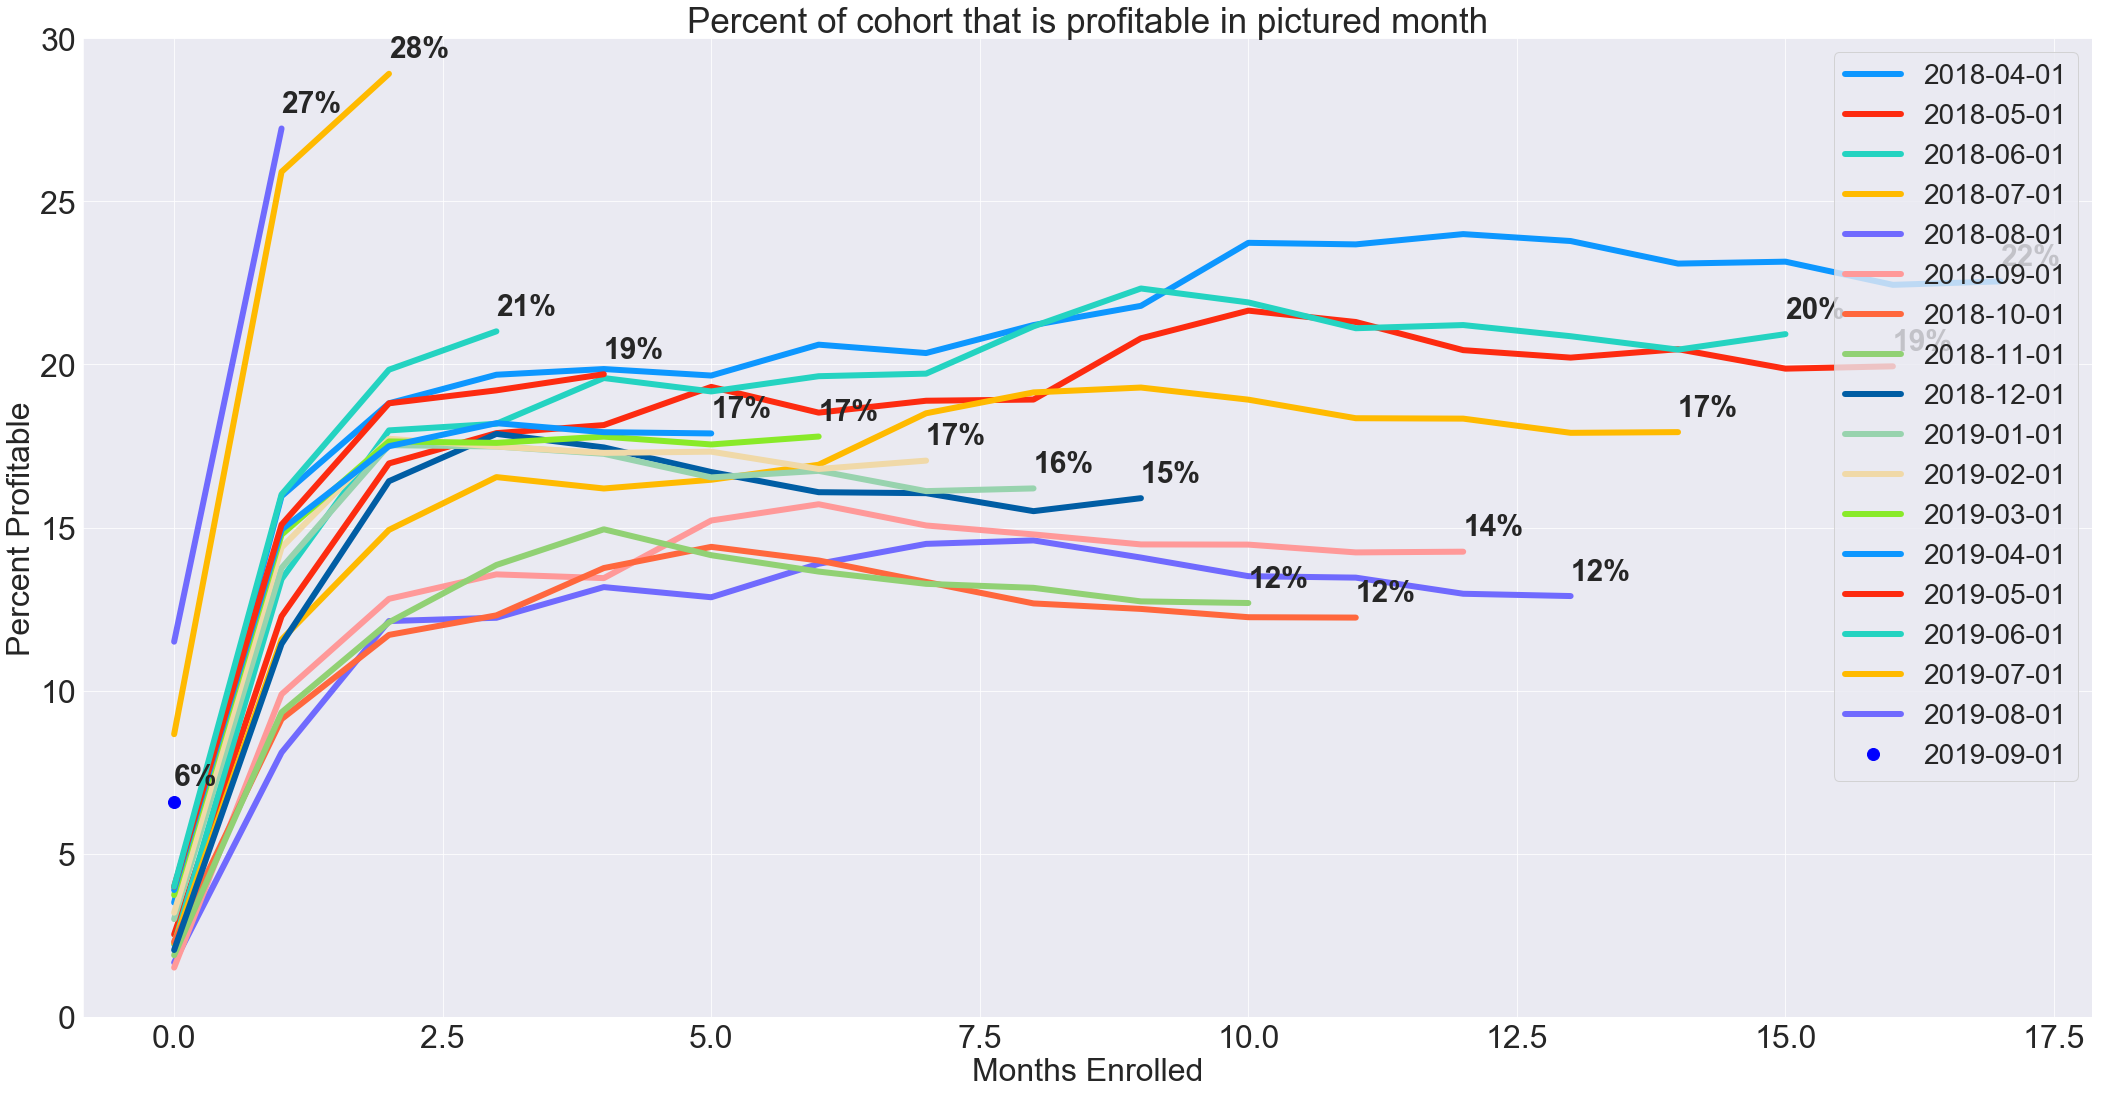

In [62]:
last_month = date(date.today().year, date.today().month, 1) + relativedelta.relativedelta(months=-1)

fig, ax = plt.subplots(figsize=(36,18))

c = single_month_tr.cohort.unique()
for x in c:
    if x == last_month:
        ax.plot(single_month_tr[single_month_tr.cohort == x].months_enrolled, single_month_tr[single_month_tr.cohort == x].target_rev_rate, 'bo', ms=12)
    else:
        ax.plot(single_month_tr[single_month_tr.cohort == x].months_enrolled, single_month_tr[single_month_tr.cohort == x].target_rev_rate, linewidth=6)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.ylabel('Percent Profitable', fontsize=32)
plt.xlabel('Months Enrolled', fontsize=32)
plt.title('Percent of cohort that is profitable in pictured month', fontsize=35)
plt.legend(single_month_tr.cohort.unique(), fontsize=28)


maxes = single_month_tr[['cohort', 'months_enrolled']].groupby('cohort', as_index=False).max()
for x in c:
    max_val = int(maxes[maxes.cohort == x].months_enrolled)
    ax.text(single_month_tr[(single_month_tr.months_enrolled == max_val) & (single_month_tr.cohort == x)].months_enrolled,
            single_month_tr[(single_month_tr.months_enrolled == max_val) & (single_month_tr.cohort == x)].target_rev_rate+.5,
            str(int(single_month_tr[(single_month_tr.months_enrolled == max_val) & (single_month_tr.cohort == x)].target_rev_rate))+'%',
            fontsize=30,
            ha='left',
#             backgroundcolor='white',
           weight='bold')



plt.savefig('../print_screen/{}_percent_profitable_monthly.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))

plt.ylim(0,30)


### All Years

In [63]:
target_revenue_yearly_query = read_query('New_Customer_Target_Revenue_Rate_Yearly.sql')

In [64]:
if run_from_csv:
    yearly_tr_rate = pd.read_csv("../output/{}_New_Customer_Yearly_Target_Revenue_Archive.csv".format(prefix), index_col=0, date_parser=dateparse, parse_dates=[1])
    yearly_tr_rate['cohort'] = [dt.to_pydatetime().date() for dt in yearly_tr_rate.cohort]
else:
    yearly_tr_rate = redshift(target_revenue_yearly_query)

In [66]:
# Save dataframe as CSV:
if as_csv:
    yearly_tr_rate.to_csv("../new_cust_output/{}_New_Customer_Yearly_Target_Revenue_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved New Customer Target Revenue results to CSV.')

Saved New Customer Target Revenue results to CSV.


# Commenting out to due errors
plt.figure(figsize=(36,18))
x = [0,1,2,3,4,5,6]  #,6]
y = yearly_tr_rate.target_rev_rate
title = 'Percent of customers who were profitable in third month'
ylabel = 'Percent of customers'
ylow = 0
ylim = 100
colors= ['#0D97FF', '#FD2B10', '#24D3C1', '#FFBA00', '#706AFE', '#FF9999', '#FF673D',  '#91D174',  '#005DA4', '#98D3AE']
labels = ['2012','2013','2014','2015','2016','2017','2018']  #, '2018 (So Far)']
plt.bar(x,y, color = colors)
plt.ylabel(ylabel, fontsize=30)
plt.title(title, fontsize=30)
plt.xticks(x,labels, fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(ylow,ylim)
for n in x:
    plt.text(x[n],y[n]+1,int(y[n]), ha='center', fontsize=30)
    
plt.savefig('../print_screen/{}_target_revenue_yearly.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))
plt.show()

In [67]:
new_brand_palette = ['#0D97FF', '#FD2B10', '#24D3C1', '#FFBA00', '#706AFE', '#FF9999', '#FF673D',  '#91D174', '#005DA4', '#98D3AE', '#F0D9A8', '#89EA29']
new_goals = sns.color_palette(palette=new_brand_palette)
sns.set_palette(new_goals)

# Customer Confidence & Delight

## NPS

In [68]:
nps_query = read_query('nps.sql')

In [69]:
nps = redshift(nps_query)

In [70]:
# Save dataframe as CSV:
if as_csv:
    nps.to_csv("../new_cust_output/{}_NPS_Archive.csv".format(date.today().strftime('%Y-%m-%d')))
    print('Saved Monthly NPS results to CSV.')

Saved Monthly NPS results to CSV.


In [71]:
nps = nps[(nps.month_date >= date(2018,8,1)) & (nps.month_date < date(2019,11,1))]

In [72]:
nps.head()

,month_date,nps_score
51,2018-08-01,62.35
52,2018-09-01,62.39
53,2018-10-01,66.08
54,2018-11-01,65.95
55,2018-12-01,62.50


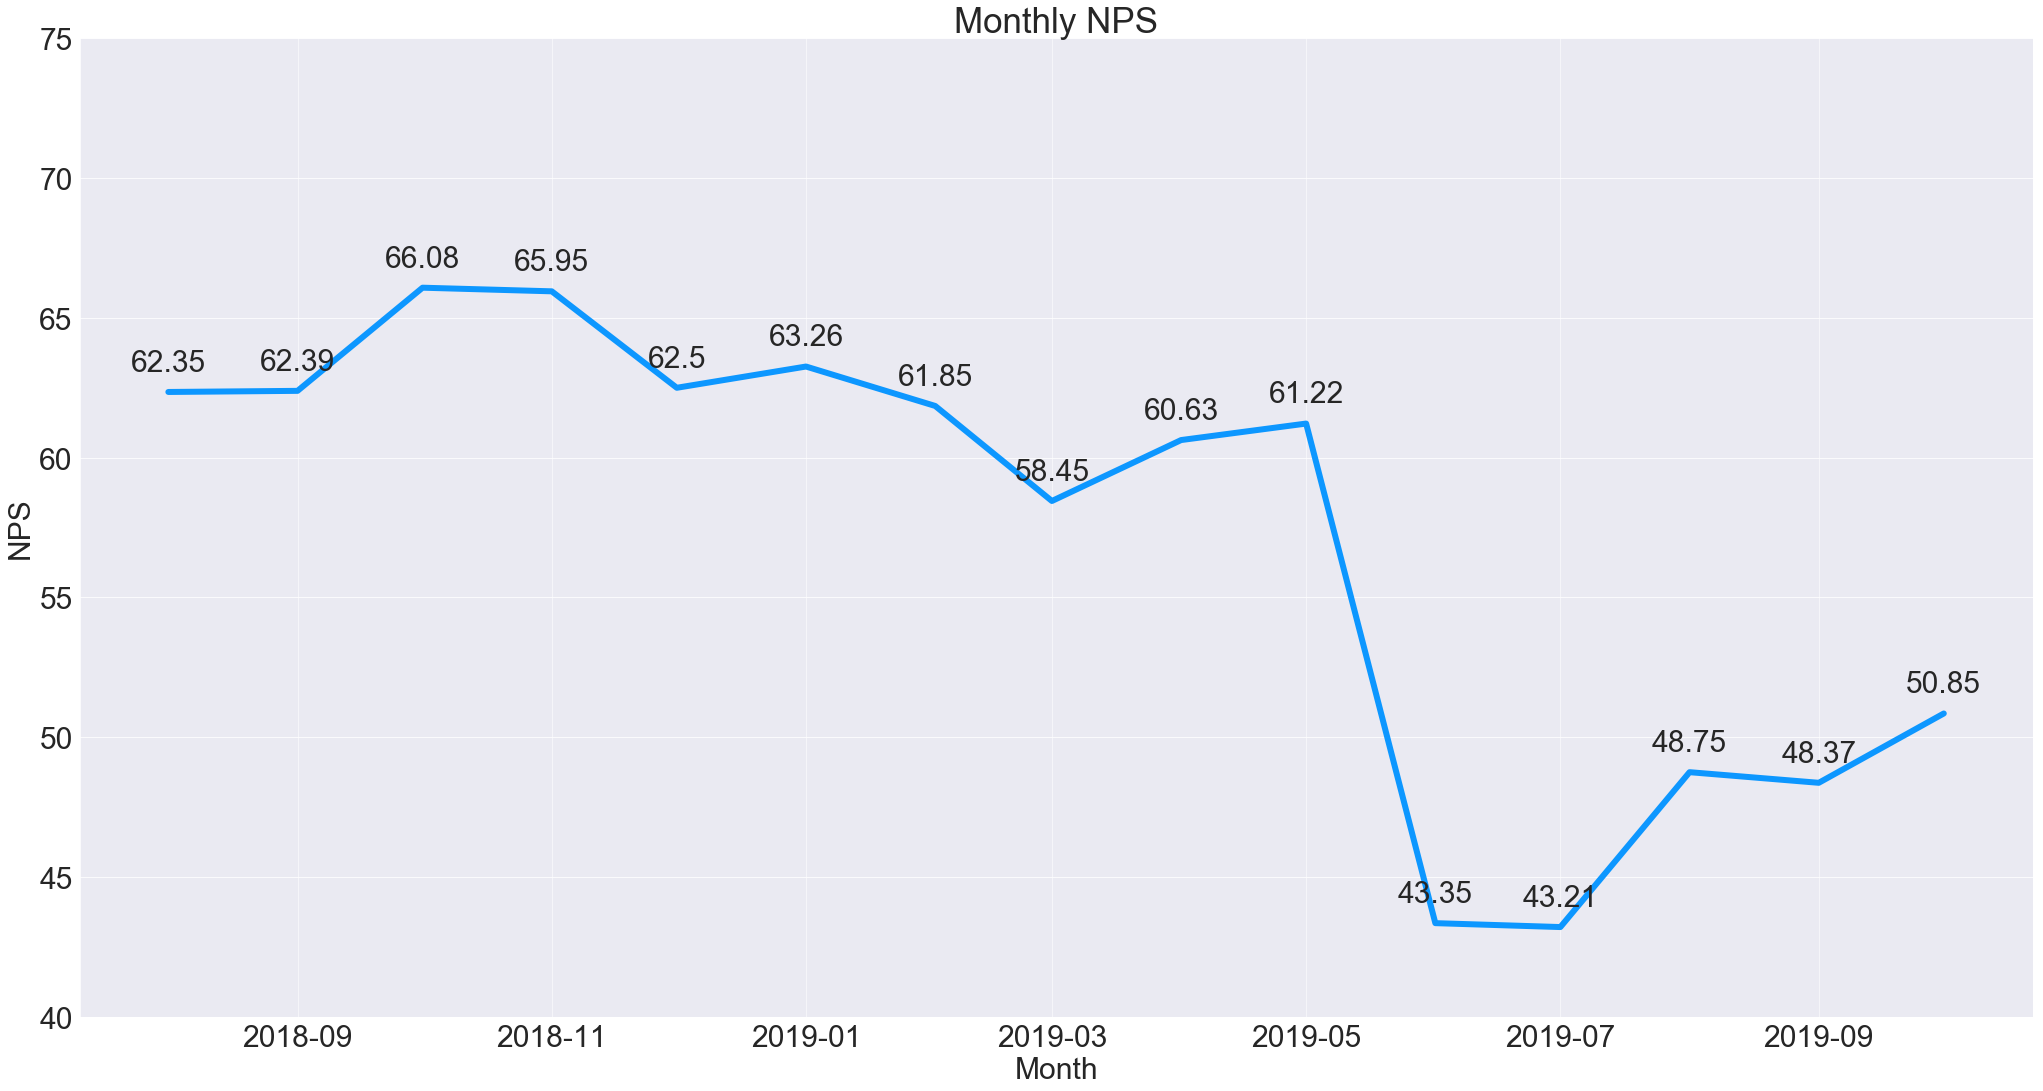

In [73]:
nps = nps[nps.month_date >= date(2017,5,1)]
plt.figure(figsize=(35,18))
plt.plot(nps.month_date, nps.nps_score, label='NPS', linewidth=6)
plt.ylim(40,75)
plt.grid(b=True, axis='x', which ='both', alpha=0.7)
plt.xticks(fontsize=30)
plt.xlabel('Month', fontsize=30)
plt.ylabel('NPS', fontsize=30)
plt.title('Monthly NPS', fontsize=35)
plt.yticks(fontsize=30)
val = list(nps.nps_score)

for m in nps.month_date:
    plt.text(m, 
             nps[nps.month_date == m].nps_score+.75,
             str(float(nps[nps.month_date == m].nps_score)),
             fontsize=30,
             ha='center')

plt.savefig('../print_screen/{}_NPS.png'.format(date.today().strftime('%Y-%m-%d'), bbox_inches='tight'))

### NPS from Contacting Customers

In [62]:
nps_contact = redshift("""
with cr as (
  select distinct
  	user_id,
  	date_trunc('month', (date_trunc('month', created_at) + interval '32 days')) as month
  from
  	mtr_customer_contact
  where
	contact_initiator = 'customer'
    AND date_trunc('month', created_at)::date >= '2017-01-01'
  group by 1,2),

scores as (
  select
	date_trunc('month', when_recorded)::date as month,
	sum(nps)::decimal/count(*) as nps,
	count(*) as responses
from
	mtr_nps_score n
join 
    cr on n.user_id = cr.user_id and date_trunc('month', n.when_recorded) = cr.month
WHERE 
    date_trunc('month', when_recorded)::date >= '2017-02-01'
group by 1
order by 1)

SELECT * FROM scores
ORDER BY month asc;
""")

ProgrammingError: (psycopg2.ProgrammingError) relation "mtr_nps_score" does not exist
 [SQL: "\nwith cr as (\n  select distinct\n  \tuser_id,\n  \tdate_trunc('month', (date_trunc('month', created_at) + interval '32 days')) as month\n  from\n  \tmtr_customer_contact\n  where\n\tcontact_initiator = 'customer'\n    AND date_trunc('month', created_at)::date >= '2017-01-01'\n  group by 1,2),\n\nscores as (\n  select\n\tdate_trunc('month', when_recorded)::date as month,\n\tsum(nps)::decimal/count(*) as nps,\n\tcount(*) as responses\nfrom\n\tmtr_nps_score n\njoin \n    cr on n.user_id = cr.user_id and date_trunc('month', n.when_recorded) = cr.month\nWHERE \n    date_trunc('month', when_recorded)::date >= '2017-02-01'\ngroup by 1\norder by 1)\n\nSELECT * FROM scores\nORDER BY month asc;\n"] (Background on this error at: http://sqlalche.me/e/f405)

In [ ]:
nps_no_contact = redshift("""
with cr as (
  select distinct
  	user_id,
  	date_trunc('month', (date_trunc('month', created_at) + interval '32 days')) as month
  from
  	mtr_customer_contact
  where
	contact_initiator = 'customer'
    AND date_trunc('month', created_at)::date >= '2017-01-01'
  group by 1,2),

scores as (
  select
	date_trunc('month', when_recorded)::date as month,
	sum(nps)::decimal/count(*) as nps,
	count(*) as responses
from
	mtr_nps_score n
left join cr on n.user_id = cr.user_id and date_trunc('month', n.when_recorded) = cr.month
WHERE 
    date_trunc('month', when_recorded)::date >= '2017-02-01'
    AND cr.user_id IS NULL AND cr.month IS NULL
group by 1
order by 1)

SELECT * FROM scores
ORDER BY month asc;
""")

In [ ]:
nps_contact = nps_contact[(nps_contact.month >= date(2017,11,1)) & (nps_contact.month < date(2019,2,1))]
nps_no_contact = nps_no_contact[(nps_no_contact.month >= date(2017,11,1)) & (nps_no_contact.month < date(2019,2,1))]

In [ ]:
nps_contact_pre = nps_contact[nps_contact.month <= date(2017,11,1)]
nps_contact_post = nps_contact[(nps_contact.month >= date(2018,1,1)) & (nps_contact.month < date(2018,10,1))]

nps_no_contact_pre = nps_no_contact[nps_no_contact.month <= date(2017,12,1)]
nps_no_contact_post = nps_no_contact[(nps_no_contact.month >= date(2018,1,1)) & (nps_no_contact.month < date(2018,10,1))]

In [ ]:
fig, ax = plt.subplots(figsize=(24,18))

ax.bar(1, nps_contact_pre.nps.mean(), width=.5, align='edge', color='#0D97FF') # nps_contact_pre.month
ax.bar(1.5, nps_contact_post.nps.mean(), width=.5, align='edge', color='#FD2B10')
# ax.bar(1.5, nps_no_contact_pre.nps.mean(), width=.5, align='edge', color='#0D97FF') # nps_contact_post.month


# ax.bar(3, nps_contact_post.nps.mean(), width=.5, align='edge', color='#FD2B10')
ax.bar(3, nps_no_contact_pre.nps.mean(), width=.5, align='edge', color='#0D97FF')
ax.bar(3.5, nps_no_contact_post.nps.mean(), width=.5, align='edge', color='#FD2B10')

plt.text(1.25, nps_contact_pre.nps.mean()+1, str(int(nps_contact_pre.nps.mean())), ha='center', fontsize=30)
plt.text(1.75, nps_contact_post.nps.mean()+1, str(int(nps_contact_post.nps.mean())), ha='center', fontsize=30)
plt.text(3.25, nps_no_contact_pre.nps.mean()+1, str(int(nps_no_contact_pre.nps.mean())), ha='center', fontsize=30)
plt.text(3.75, nps_no_contact_post.nps.mean()+1, str(int(nps_no_contact_post.nps.mean())), ha='center', fontsize=30)

plt.yticks(fontsize=32)
plt.xticks([1.5, 2.5, 3.5], ['Contacting Customers', '', 'Non-Contacting Customers'], fontsize=32)
plt.legend(['Pre-Delay (4/17 - 11/17)', 'Post-Delay (12/17-2/18)'], fontsize=32)
plt.title('Effect of Contact Delays on NPS', fontsize=35)
plt.ylabel('Average NPS', fontsize=32)
plt.ylim(0, 100)


In [ ]:
fig, ax = plt.subplots(figsize=(36,18))
ax.plot(nps_contact.month, nps_contact.nps, linewidth=6)
ax.plot(nps_no_contact.month, nps_no_contact.nps, linewidth=6) 
# ax.plot(broad_nps_contact.month, broad_nps_contact.nps, linewidth=6)
# ax.plot(broad_nps_no_contact.month, broad_nps_no_contact.nps, linewidth=6)
plt.yticks(fontsize=32)
plt.xticks(fontsize=32)
plt.legend(['Contacting Customers', 'Non-Contacting Customers'], fontsize=32)
plt.title('Effect of Contact Delays on NPS', fontsize=35)
plt.ylim(50, 75)

In [ ]:
broad_nps_contact = redshift("""
with cr as (
  select distinct
  	user_id,
--  	date_trunc('month', (date_trunc('month', created_at) + interval '32 days')) as month
    date_trunc('month', created_at)::date as month
  from
  	mtr_customer_contact
  where
	contact_initiator = 'customer'
    AND date_trunc('month', created_at)::date BETWEEN '2017-11-01' AND '2018-01-01'
  group by 1 ,2
  ),

scores as (
  select
	date_trunc('month', when_recorded)::date as month,
	sum(nps)::decimal/count(*) as nps,
	count(*) as responses
from
	mtr_nps_score n
join 
   cr on n.user_id = cr.user_id and date_trunc('month', n.when_recorded) > cr.month
WHERE 
    date_trunc('month', when_recorded)::date > '2017-11-01'
--    AND n.user_id IN (SELECT user_id from cr)
group by 1
order by 1)

SELECT * FROM scores
ORDER BY month asc;
""")

In [ ]:
broad_nps_no_contact = redshift("""
with cr as (
  select distinct
  	user_id,
--  	date_trunc('month', (date_trunc('month', created_at) + interval '32 days')) as month
    date_trunc('month', created_at)::date as month
  from
  	mtr_customer_contact
  where
	contact_initiator = 'customer'
    AND date_trunc('month', created_at)::date BETWEEN '2017-11-01' AND '2018-01-01'
  group by 1 ,2
  ),

scores as (
  select
	date_trunc('month', when_recorded)::date as month,
	sum(nps)::decimal/count(*) as nps,
	count(*) as responses
from
	mtr_nps_score n
WHERE 
    date_trunc('month', when_recorded)::date >= '2017-11-01'
    AND n.user_id NOT IN (SELECT user_id from cr)
group by 1
order by 1)

SELECT * FROM scores
ORDER BY month asc;
""")

---

## Activation

### Percent Transacting within 12 Months

In [ ]:
transaction_active_cohort = redshift("""
WITH monthly AS (
SELECT 
    a.month, 
    a.user_id, 
    CASE
        WHEN COUNT(transaction_id) > 0 THEN 1
        ELSE 0 
    END AS transaction_state
  FROM mtr_monthly_customer_activity a
  LEFT JOIN mtr_transaction_dive d ON  a.month::DATE = DATE_TRUNC('month', d.settlement_date)::DATE 
      AND a.user_id = d.user_id
  WHERE 
    a.month >= '2013-01-01'
  AND a.month < date_trunc('month',sysdate)
  GROUP BY 1,2
),

cohort AS(
SELECT datediff(month,enrolled,month) AS months_enrolled, user_id, date_trunc('year',enrolled)::date AS cohort, transaction_state
FROM monthly
JOIN mtr_user_first_activity USING (user_id)
)


SELECT cohort, months_enrolled, sum(transaction_state) AS transaction_num, count(transaction_state) AS user_num
FROM cohort
GROUP BY 1,2
ORDER BY 1,2
"""
)

In [ ]:
transaction_active_cohort['percent_transact'] = transaction_active_cohort.transaction_num/transaction_active_cohort.user_num*100

In [ ]:
fig, ax = plt.subplots(figsize=(36,18))
l = transaction_active_cohort.cohort.unique()
data = transaction_active_cohort[transaction_active_cohort.months_enrolled >0&(transaction_active_cohort.months_enrolled <=12)]
for x in l:
    d = data[data.cohort == x]
    ax.plot(d['months_enrolled'], d['percent_transact'], linewidth=6)
plt.legend(['2012','2013','2014','2015','2016','2017'], fontsize=28)
plt.xlabel('Months Enrolled', fontsize=32)
plt.ylabel('Percent of Customers', fontsize=32)
plt.ylim(0,100)
plt.xlim(1,12)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.title('Percent of customers who had at least 1 transaction in the first 12 months', fontsize=32)
plt.show()

### Percent Target Revenue within 12 Months

In [ ]:
target_rev_cohort = redshift("""
WITH monthly AS (
  SELECT DISTINCT
    month, 
    user_id, 
    CASE
        WHEN (((avg(balance) * (.0264/12))+ ((sum(swipe_count)*.22) + (sum(swipe_volume)*.0005))) >=5) THEN 1
        ELSE 0 
    END AS target_rev_state
  FROM mtr_daily_customer_activity
  JOIN mtr_user_first_activity USING (user_id)
  WHERE date >= '2013-01-01'
  AND month < date_trunc('month',sysdate)
  AND datediff(month, enrolled, month) < 30
  GROUP BY 1,2
),

cohort AS(
SELECT datediff(month,enrolled,month) AS months_enrolled, user_id, date_trunc('year',enrolled)::date AS cohort, target_rev_state
FROM monthly
JOIN mtr_user_first_activity USING (user_id)
)

SELECT cohort, months_enrolled, sum(target_rev_state) AS target_rev_num, count(target_rev_state) AS user_num
FROM cohort
GROUP BY 1,2
ORDER BY 1,2
"""
)

In [ ]:
target_rev_cohort['percent_target_rev'] = target_rev_cohort.target_rev_num/target_rev_cohort.user_num*100

In [ ]:
fig, ax = plt.subplots(figsize=(36,18))
l = target_rev_cohort.cohort.unique()
data = target_rev_cohort[target_rev_cohort.months_enrolled >0&(target_rev_cohort.months_enrolled <=12)]
for x in l:
    d = data[data.cohort == x]
    ax.plot(d['months_enrolled'], d['percent_target_rev'], linewidth=6)
plt.legend(['2012','2013','2014','2015','2016','2017'], fontsize=28)
plt.xlabel('Months Enrolled', fontsize=32)
plt.ylabel('Percent of Customers', fontsize=32)
plt.ylim(0,100)
plt.xlim(1,12)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.title('Percent of customers who generated target revenue in the first 12 months', fontsize=32)
plt.show()

## NPS by Cohort

In [ ]:
by_cohort = redshift("""
WITH scores as (
    SELECT 
        date_trunc('month', nps.when_recorded)::date AS when_recorded,
        TO_CHAR(ufa.enrolled, 'YYYY') AS cohort,
        DATEDIFF('months', ufa.enrolled, nps.when_recorded) as months_enrolled,
        SUM(nps.nps) AS nps_sum,
        COUNT(DISTINCT nps.user_id) AS user_count
    FROM 
        analytics.mtr_nps_score AS nps
    INNER JOIN 
        analytics.user_event_current AS uec ON nps.user_id = uec.user_id
    INNER JOIN 
        analytics.mtr_user_first_activity AS ufa ON ufa.user_id = uec.user_id
GROUP BY 1,2, 3
ORDER BY 
    when_recorded ASC,
    cohort ASC 
  )


select
     cohort,
     months_enrolled,
    SUM(nps_sum)/SUM(user_count)::float as nps
from (
    select * 
    from scores 
    where when_recorded != '2017-02-01'
   
    union all
    
    select 
        '2017-02-01'::date as when_recorded,
        scores.cohort,
        months_enrolled,
        avg(nps_sum),
        avg(user_count)
    from scores
    where when_recorded in ('2017-01-01', '2017-03-01')
    group by 1,2,3)
group by 1, 2
order by 1, 2
""")

In [ ]:
by_cohort = by_cohort.pivot(index='months_enrolled', columns='cohort', values='nps')

In [ ]:
fig, ax = plt.subplots(figsize=(36,18))
ax.plot(by_cohort[by_cohort.index <= 36], linewidth=6)
plt.legend(list(by_cohort.keys()), fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Months Enrolled', fontsize=32)
plt.ylabel('NPS', fontsize=32)

# The End.